In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("SMSSpamCollection.txt",names=['labels','message'],sep='\t')

In [3]:
df.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91916\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='labels', ylabel='count'>

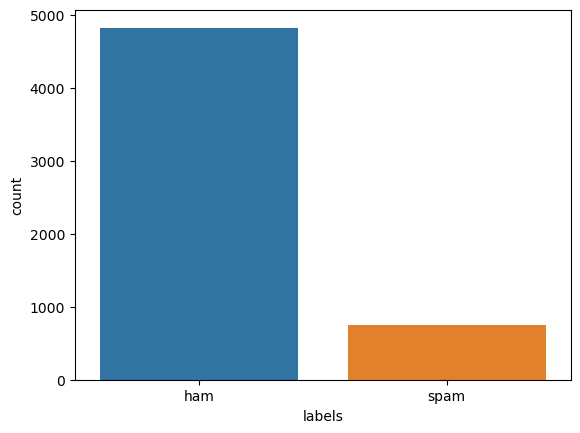

In [5]:
sns.countplot(df['labels'])

In [6]:
df.dtypes

labels     object
message    object
dtype: object

In [7]:
#its still txt file so convert it to the csv file...

In [8]:
df.to_csv("SMSSpamCollection.csv")

In [9]:
df

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [11]:
ps=PorterStemmer()

In [13]:
corpus=[]
for i in range(0,len(df)):
    review=re.sub('[^a-zA-Z]',' ', df['message'][i])
    review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)
    

In [14]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate t c appli',
 'u dun say earli hor u c alreadi say',
 'nah i think goe usf live around though',
 'freemsg hey darl week word back i like fun still tb ok xxx std chg send rcv',
 'even brother like speak they treat like aid patent',
 'as per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner as valu network custom select receivea prize reward to claim call claim code kl valid hour',
 'had mobil month u r entitl updat latest colour mobil camera free call the mobil updat co free',
 'i gonna home soon want talk stuff anymor tonight k i cri enough today',
 'six chanc win cash from pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent you week free membership prize jackpot txt word claim no t c www dbuk net lccltd pobo

In [15]:
#now applying the bag of words on data...

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x=cv.fit_transform(corpus).toarray()

In [17]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
df['labels']=df['labels'].replace(['spam','ham'],[0,1])

In [19]:
df['labels']

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: labels, Length: 5572, dtype: int64

In [20]:
y=df['labels']

In [23]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: labels, Length: 5572, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
#now fitting data to the multinomialnb

In [28]:
spam_ham=MultinomialNB().fit(x_train,y_train)

In [29]:
y_pred=spam_ham.predict(x_test)

In [30]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [31]:
print(accuracy_score(y_pred,y_test))

0.9826555023923444


In [32]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       226
           1       0.99      0.99      0.99      1446

    accuracy                           0.98      1672
   macro avg       0.97      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [33]:
print(confusion_matrix(y_pred,y_test))

[[ 209   17]
 [  12 1434]]
